In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys

sys.path.append("/Users/lpozzi/repos/polso/strava/")

import pandas as pd

from IPython.display import Markdown

from strava_dash import StravaScraper

In [2]:
tsugaru_distance = 28968.2 / StravaScraper.M_TO_YD
tsugaru_distance

26488.60196962354

Doing the math you have `2 + 2 * P{going on first day} + P{going on the second day} >= 2 days`


```
The average temperature is as below,
July　        Aomori side 20-22°C　Hokkaido side 14-15°C
August　     Aomori side 24-25°C　Hokkaido side 18-20°C
September　Aomori side 22-24°C　Hokkaido side 18-20°C 
```

In [3]:
%%capture
training = StravaScraper()
training.get_swims(after='2018-11-01', before='2019-09-01')
training.get_xtraining(after='2018-11-01', before='2019-09-01')

## The Plan

| Month    | Days |  Yds/Week  |    X-Train Sesh   |  Running miles  |
| :------- |:---: | :--------: | :---------------: | :-------------: |
| November | 30   |   20,000   | Yoga+Strength+Run         |    |
| December | 31   |   25,000   |    4    |    |
| January  | 31   |   28,000   |    5    |    |
| February | 28   |   30,000   |    5    |    |
| March    | 31   |   30,000   |    5    |    |
| April    | 31   |   35,000   |    3-4  |    |
| May      | 31   |   30,000   |    3-4    |    |
| June     | 30   |   35,000   |    5    |    |
| July     | 31   |   35,000   |    3-4    |    |
| August   | 31   |   20.000   |   Yoga    |    |

## The Execution

In [9]:
from IPython.display import Markdown

Markdown("""
##### Total Yards: {0} 
""".format(training.total_yards))


##### Total Yards: 649035 


In [4]:
training.monthly_yardage

,distance,hours,weekly distance
January,39425.077944,12.580278,9856.269486
February,79435.346599,25.206111,19858.836650
March,86772.922894,27.959444,21693.230724
April,73909.116547,23.843333,18477.279137
May,81544.592206,26.697778,20386.148052
June,86922.419381,27.099722,21730.604845
July,65743.568121,22.673889,16435.892030
August,92692.961907,26.205000,23173.240477
November,9008.284292,2.866944,2252.071073
December,33580.716743,11.211667,8395.179186


## Yards

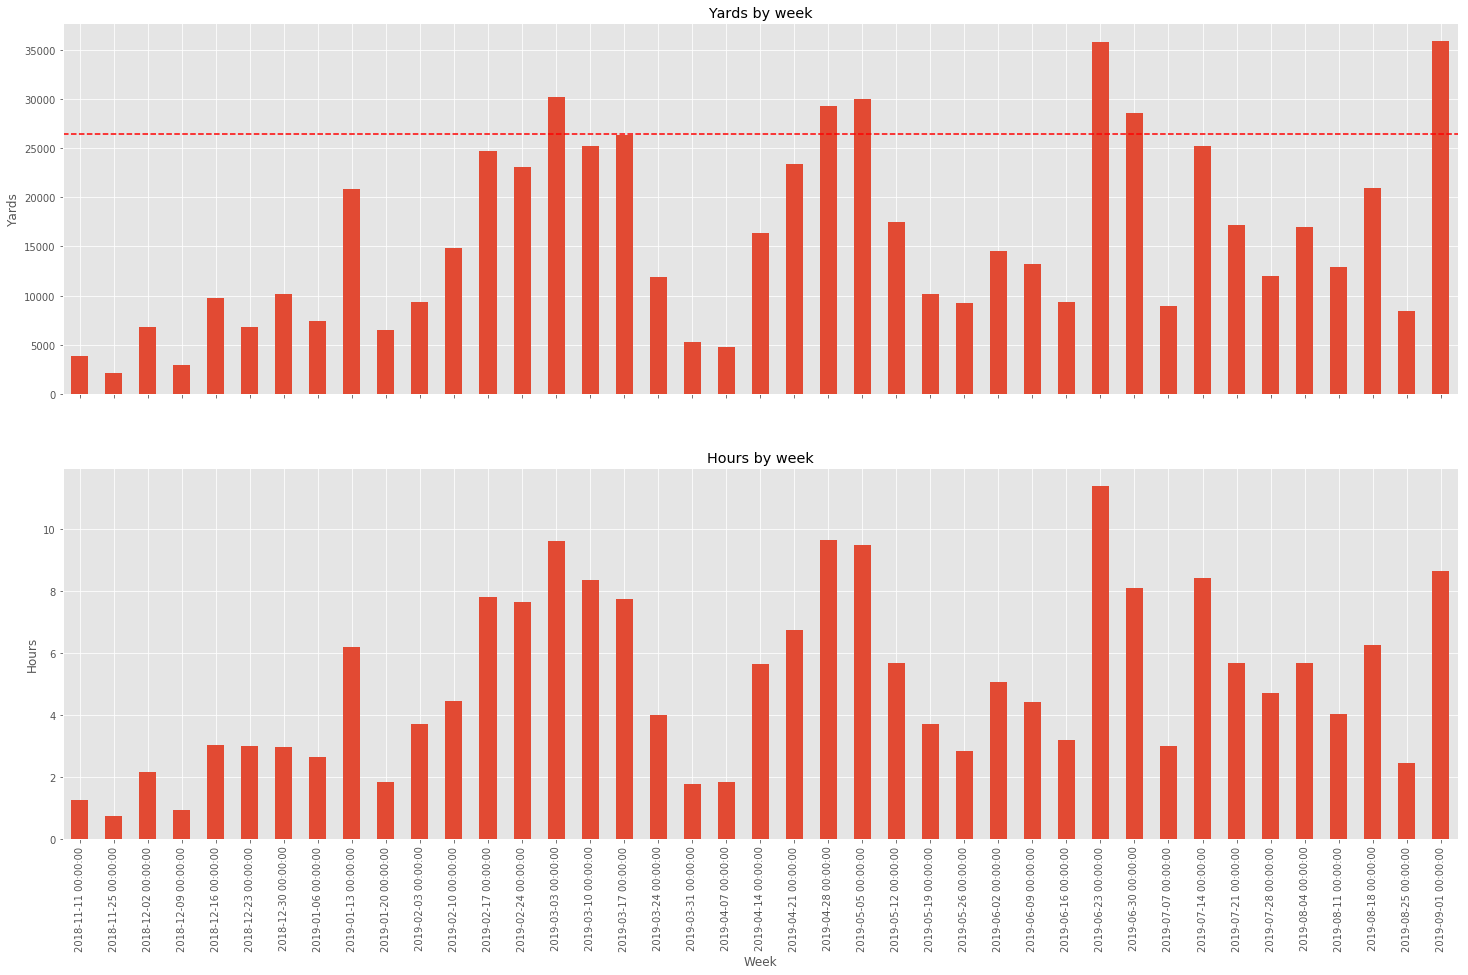

In [5]:
tmp = training.plot_summary(yardage_goal=tsugaru_distance)

## In N Out

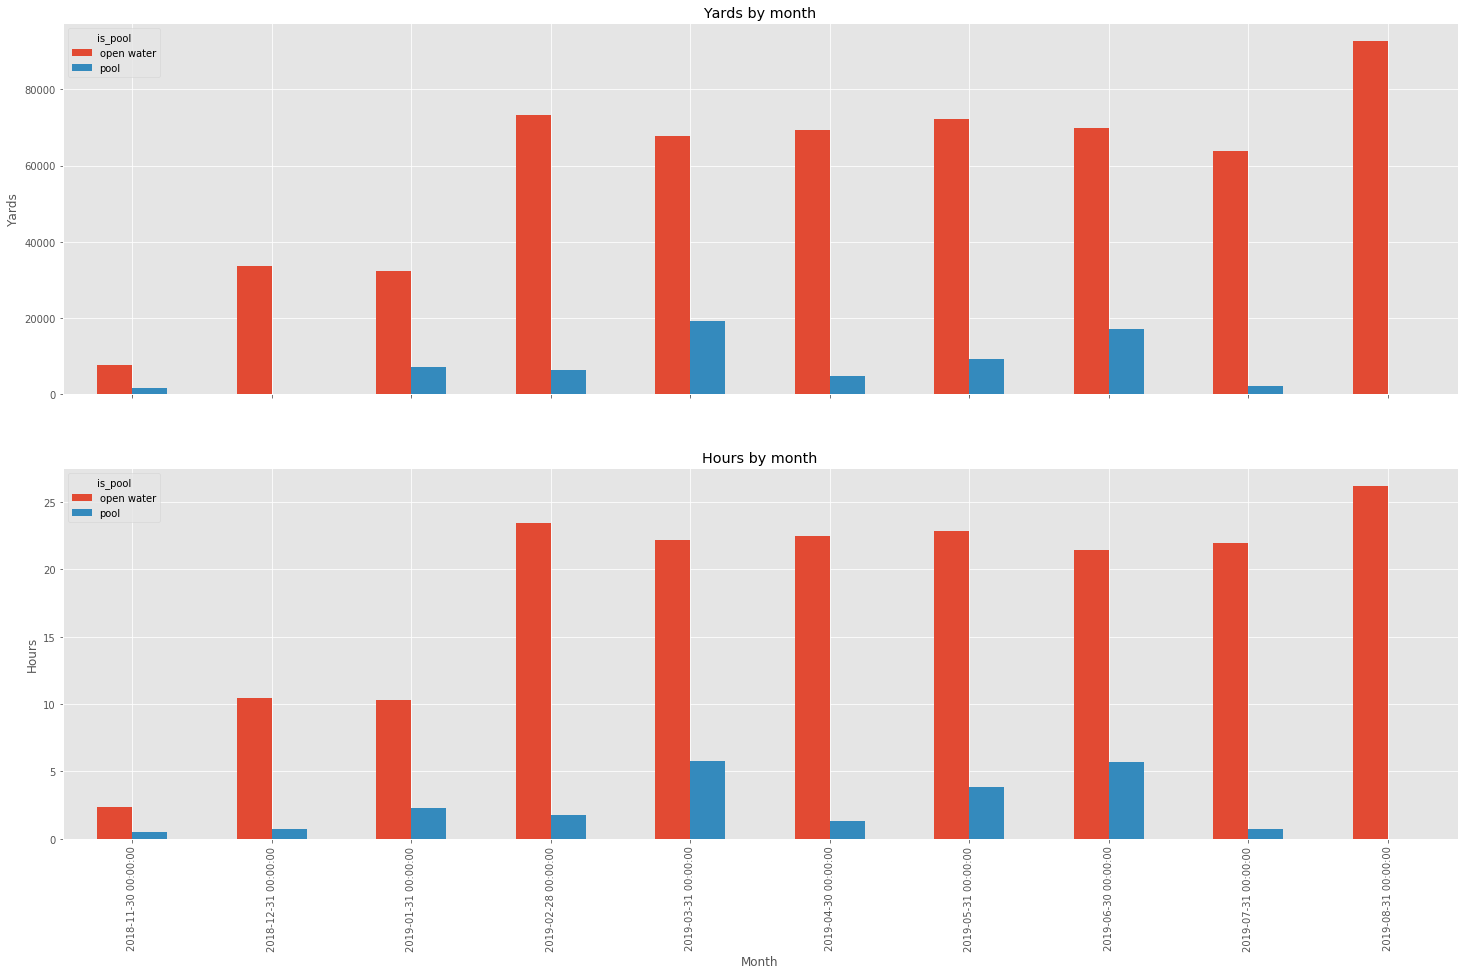

In [6]:
tmp = training.plot_summary(in_n_out=True, by='month')

## Crosstraining

In [50]:
training.x_training.activity.unique()

array([u'Rowing', u'Run', u'WeightTraining', u'Yoga'], dtype=object)

In [55]:
swims = training.swims
swims['activity'] = swims['is_pool'].apply(lambda x: {'open water': 'OpenWater', 'pool':'Pool'}[x])
full_training = pd.concat([swims[training.x_training.columns], training.x_training])
full_training.groupby('activity')['elapsed_time'].sum().apply(lambda x: x / 3600)

activity
OpenWater         183.697222
Pool               22.646944
Rowing              5.966944
Run                10.808889
WeightTraining     25.333333
Yoga                8.333333
Name: elapsed_time, dtype: float64

In [56]:
full_training.groupby(['ds_month_ending', 'activity'])['elapsed_time'].sum().apply(lambda x: x / 3600).unstack()

activity,OpenWater,Pool,Rowing,Run,WeightTraining,Yoga
ds_month_ending,,,,,,
2018-11-30,2.366944,0.500000,NaN,0.692778,NaN,1.333333
2018-12-31,10.461667,0.750000,NaN,3.676111,3.000000,NaN
2019-01-31,10.330278,2.250000,NaN,0.269444,1.000000,2.000000
2019-02-28,23.456111,1.750000,0.250000,0.313056,4.000000,3.000000
2019-03-31,22.151667,5.807778,NaN,0.508889,3.000000,1.000000
2019-04-30,22.510000,1.333333,0.116667,1.394722,4.000000,1.000000
2019-05-31,22.864444,3.833333,NaN,1.431111,3.000000,NaN
2019-06-30,21.427222,5.672500,NaN,NaN,3.333333,NaN
2019-07-31,21.923889,0.750000,NaN,2.134444,3.000000,NaN


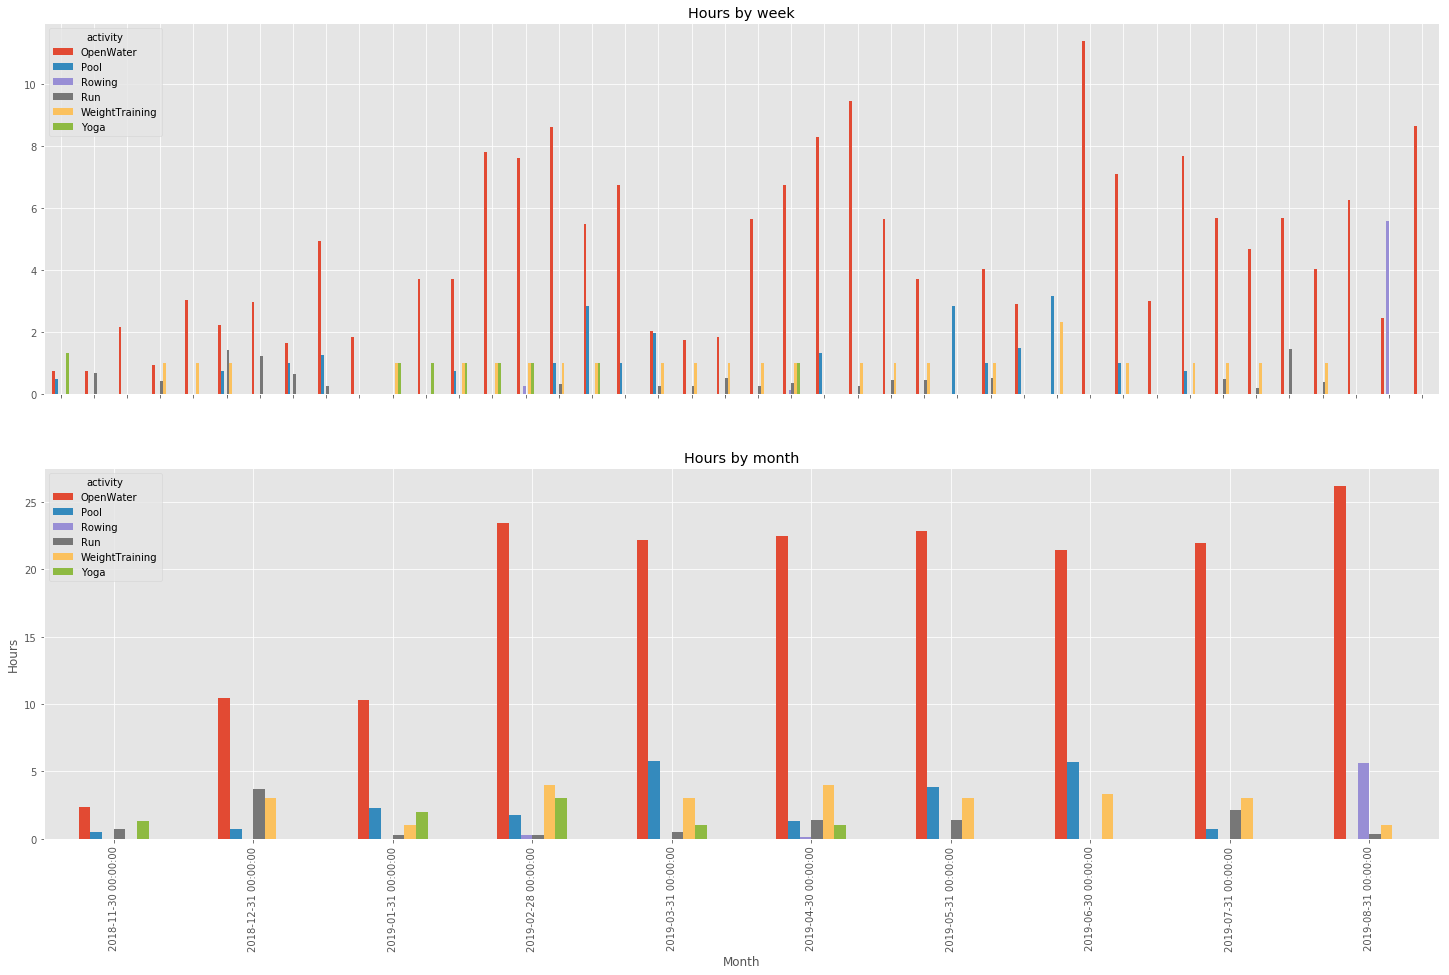

In [7]:
tmp=training.plot_x_training()

### Year on Year

In [21]:
%%capture
training_old = StravaScraper()
training_old.get_swims(after='2017-11-01', before='2018-09-30')

In [22]:
Markdown("""
##### Year on Year: 2018/2019 = {0:%} 2017/2018
""".format(training.total_yards / float(training_old.total_yards)))  


##### Year on Year: 2018/2019 = 69.332457% 2017/2018


In [23]:
training.in_out / training_old.in_out

,total,percentage
is_pool,,
open water,0.894654,1.290384
pool,0.234299,0.337935


In [42]:
train_dummy = StravaScraper()
total_yards = []
in_out = []
for after, before in [('2017-01-01', '2017-09-05'),
                      ('2017-11-01', '2018-09-30'), 
                      ('2018-11-01', '2019-09-01')]:
    train_dummy.get_swims(after=after, before=before)
    total_yards.append(train_dummy.total_yards)
    in_out.append(train_dummy.in_out.total)
training_years = pd.merge(pd.DataFrame(total_yards, index=['2017', '2018', '2019']),
                          pd.DataFrame(in_out, index=['2017', '2018', '2019']), 
                          right_index=True, left_index=True)
training_years.columns = ['total_yards', 'open_water', 'pool']

In [43]:
training_years

,total_yards,open_water,pool
2017,1151960,685453.094522,466507.013833
2018,936120,650715.010316,285405.744638
2019,649035,582164.801491,66870.205143


# Appendix Full Training

In [10]:
from IPython.display import HTML
HTML(training.get_full_training().to_html())

,ds_week_ending,name,distance,hours,activity
2018-11-07 06:39:15-08:00,2018-11-11,Daylights savings swim,2383.085551,0.750556,open water
2018-11-07 18:45:00-08:00,2018-11-11,[POOL] back indoor,1499.995476,0.500000,pool
2018-11-08 19:30:00-08:00,2018-11-11,Namaste and chill,0.000000,1.333333,Yoga
2018-11-23 11:45:08-08:00,2018-11-25,Turkey trot 🦃,5851.250944,0.692778,Run
2018-11-25 15:20:17-08:00,2018-11-25,😈 swim,2174.971568,0.739167,open water
2018-11-27 15:07:18-08:00,2018-12-02,Swimming off the 🦃,1514.212406,0.423611,open water
2018-11-29 10:55:33-08:00,2018-12-02,Morning Swim,1436.019291,0.453611,open water
2018-12-01 08:21:22-08:00,2018-12-02,Spectacular swim!,3636.690694,1.098333,open water
2018-12-01 11:07:06-08:00,2018-12-02,Justin’s First chill!,192.037916,0.190556,open water
2018-12-04 17:11:46-08:00,2018-12-09,Andata,1706.140961,0.183889,Run
